# 发票 KIE 关键信息提取

在发票图像数据集 wildreceipt 上，使用 MMOCR 预训练的 KIE 关键信息提取预训练模型，进行 KIE 关键信息提取。



## 进入 MMOCR 主目录

In [1]:
import os
os.chdir('mmocr')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmocr.egg-info',
 'data',
 'font.TTF',
 'INFO',
 'outputs']

## 导入工具包

In [2]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
# 导入 mmocr
import mmocr
from mmocr.utils.ocr import MMOCR

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '


## 下载 wildreceipt 发票数据集（训练集+测试集+字典）

In [4]:
# 下载 wildreceipt 发票数据集至 data 目录
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar -O data/wildreceipt.tar

--2022-03-28 11:33:16--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/octet-stream]
Saving to: ‘data/wildreceipt.tar’

data/wildreceipt.ta 100%[===================>] 176.74M   100MB/s    in 1.8s    

2022-03-28 11:33:17 (100 MB/s) - ‘data/wildreceipt.tar’ saved [185323520/185323520]



In [5]:
# 解压发票数据集至 data 目录
!tar -xf data/wildreceipt.tar -C data/

## 使用预训练 KIE 模型

In [6]:
mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR',device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


load checkpoint from http path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth" to /home/featurize/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


  0%|          | 0.00/18.4M [00:00<?, ?B/s]

In [7]:
result = mmocr.readtext('demo/demo_kie.jpeg', output='outputs/demo_kie_pred.jpg')

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
/home/featurize/work/MMOCR教程/0327/mmocr/mmocr/datasets/kie_dataset.py:46: UserWarning: KIEDataset is only initialized as a downstream demo task of text detection and recognitio

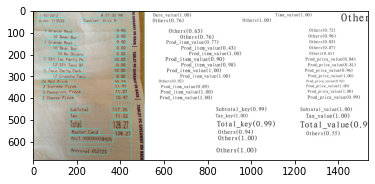

In [8]:
show_img_from_path('outputs/demo_kie_pred.jpg')

## 在测试集上评估预训练 KIE 模型性能

选择 Visual + Textual 多模态测试集，并使用 Macro F1 指标来评估

In [11]:
!python3 tools/test.py \
        configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py \
        https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth \
        --eval macro_f1

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '
/home/featurize/work/MMOCR教程/0325/mmocr/mmocr/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/home/featurize/work/MMOCR教程/0325/mmocr/mmocr/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS